In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [26]:
data = pd.read_csv("ADP.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [27]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

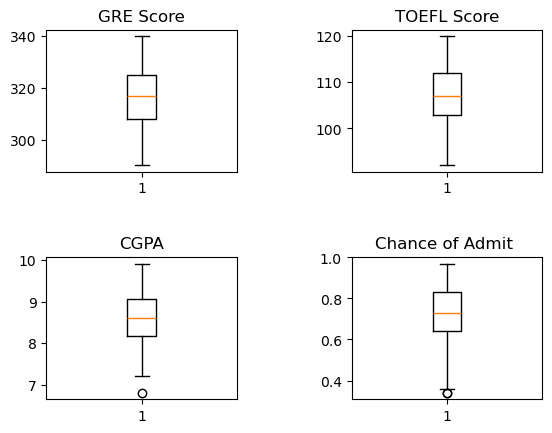

In [28]:
column_name= ["GRE Score","TOEFL Score","CGPA","Chance of Admit "]
i=1
for col in column_name:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(2,2,i)
    i+=1
    plt.boxplot(data[col])
    plt.title(col)

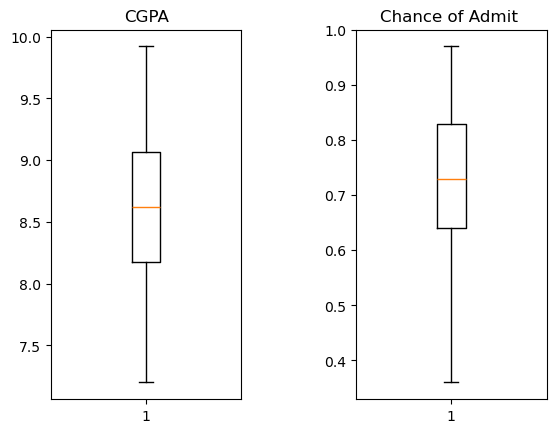

In [29]:
outlier_columns=["CGPA","Chance of Admit "]
i=1
for col in outlier_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    upper_index = np.where(data[col] >= upper)[0]
    lower_index = np.where(data[col] <= lower)[0]
    data.drop( index= upper_index,inplace= True)
    data.drop( index= lower_index,inplace= True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,2,i)
    i+=1
    plt.boxplot(data[col])
    plt.title(col)

    data.reset_index(inplace=True)
    data.drop('index',axis=1, inplace=True)   


In [30]:
x = data.drop("Chance of Admit ",axis = 1)
y = data["Chance of Admit "]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size=0.25,random_state=90)

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.score(x_test,y_test)

0.7865074426990466

In [34]:
model.score(x_train,y_train)

0.8248205802504158

In [35]:
y_pred = model.predict(x_test)
y_pred

array([0.76120975, 0.63063826, 0.57723168, 0.96217134, 0.82075473,
       0.67592319, 0.67230681, 0.65450228, 0.80552543, 0.52644085,
       0.70177142, 0.67622701, 0.68464367, 0.67365755, 0.89140745,
       0.79251848, 0.61005011, 0.54091371, 0.86727427, 0.91305155,
       0.57881715, 0.65181529, 0.86189314, 0.80194302, 0.8593346 ,
       0.61865775, 0.61108478, 0.84046556, 0.68270952, 0.55735051,
       0.73433615, 0.61833073, 0.49874365, 0.71259941, 0.68605245,
       0.74393026, 0.80849817, 0.69338137, 0.61298614, 0.49942663,
       0.99415377, 0.79113753, 0.84821711, 0.74091621, 0.67301694,
       0.79386091, 0.62574   , 0.50426059, 0.77168076, 0.74189653,
       0.65981962, 0.60217888, 0.47881801, 0.94252134, 0.85797743,
       0.74631348, 0.5312559 , 0.83219984, 0.67371592, 0.6607183 ,
       0.73010199, 0.70149088, 0.80048372, 0.71614696, 0.84971772,
       0.5856022 , 0.71715994, 0.72541916, 0.86624944, 0.78975258,
       0.9243636 , 0.86494457, 0.42640639, 0.8214167 , 0.75657

In [36]:
pd.DataFrame({'True Value':y_test, 'Predicted Value': y_pred})

,True Value,Predicted Value
331,0.71,0.761210
79,0.50,0.630638
39,0.48,0.577232
370,0.95,0.962171
256,0.77,0.820755
...,...,...
83,0.94,0.917982
156,0.61,0.598993
153,0.77,0.695286
37,0.58,0.506391


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.045598282415997705
Mean Squared Error: 0.004181744902546536
R² Score: 0.7865074426990466
